# Module 1 - importing, manipulating, and representing data 
----------------------------------------------------------------------------------------

The basis of any statistical analysis is the underlying data.

A data-set is typically presented as a file containing information formatted as a table:
 * each line correspond to an observation ( individual, sample, ... )
 * each column correspond to a measured variable ( height, sex, gene expression, ... )


To read tabulated data and manipulate them, we will rely on **[pandas](https://pandas.pydata.org/)**, 
a "high-level" module designed for statistics/exploratory data analysis. A great strength of pandas is its **DataFrame** which emulates many of the convenient behavior and syntax of their eponym counterpart in the **R** language.

To graphically represent data, we will rely on **[seaborn](https://seaborn.pydata.org/index.html)**.
Seaborn is designed to work hand-in-hand with pandas DataDrame to produce **efficient data representation** from fairly simple commands. The seaborn official website proposes [very good tutorials](https://seaborn.pydata.org/tutorial.html) as well as a [gallery](https://seaborn.pydata.org/examples/index.html) with associated code to get you started quickly.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All modules loaded successfully!")

All modules loaded successfully!


# ToC <a id='toc'></a>


1. [Reading the data](#reading)

    1.1. [the basics](#reading.1)

    1.2. [header or not header, that is the question](#reading.2)

    1.3. [setting up the row index](#reading.3)

    1.4. [other options](#reading.4)

    1.5. [more formats](#reading.5)

2. [data manipulation](#manip)

    2.1. [first contact with the data](#manip.1)

    2.2. [accessing specific parts of the data - rows and columns](#manip.2)

    2.3. [accessing specific parts of the data - selection](#manip.3)

    2.4. [Operations on columns](#manip.4)
    
    2.4. [adding/removing and combining columns](#manip.5)

3. [data description and representation](#descr)

    3.1 [basic description - common summary statistics](#descr.1)

    3.2 [Representing one column - histograms and density line](#descr.2)

    3.x.[Interlude : multi-panel figures](#multi)

    3.3 [accounting for categories in the data](#descr.3)

    3.4 [representing the relationship between 2 numerical variables](#descr.4)

4. [writing data and plot](#writing)

5. [Free form exercise](#exo)

6. [tips and tricks](#tricks)


## 1. Reading tabulated data <a id='reading'></a> 

## 1.1 The basics <a id='reading.1'></a> 

What is the file name? location?
What is the saprator between fields?

**`pd.read_table()`** is the generalist pandas function to read tabulated data files. Aside from the name of the file to read, here are some useful optional arguments:
* `sep`: separator between columns (by default `"\t"`)
* `header`: row number(s) to use as the column names. By default the first line is used as header.
  Use `header=None` if the file does not contain column names.
* `skiprows`: Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file.
* (true_values/false_values ??)

Of course you can learn (much) more using `help(pd.read_table)`.



Let's try to load the `data/titanic.csv` file. As its name suggest, this table contains data about the ill-fated [Titanic](https://en.wikipedia.org/wiki/Titanic) passengers, travelling from England to New York in April 1912. The data file is named `"titanic.csv"` and like its extension suggests, it contains **C**omma-**S**eparated **V**alues.

Note the usage of the `head()` method of a DataFrame to display only its first 5 lines.

In [7]:
import pandas as pd

df = pd.read_table("data/titanic.csv") 
df.head()                                 # By default, head() returns the 5 first lines of a DataFrame.

,"Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked"
0,"Bjornstrom-Steffansson Mr. Mauritz Hakan,male,..."
1,"Coleff Mr. Peju,male,36,3,0,0,7.5,S"
2,"Laroche Miss. Simonne Marie Anne Andree,female..."
3,"Smith Miss. Marion Elsie,female,40,2,1,0,13,S"
4,"Dooley Mr. Patrick,male,32,3,0,0,7.75,Q"


This does not look so great...

### Micro-Exercise
* Try to fix the cell just above by playing with the option(s) of `pd.read_table`.


In [8]:
help(pd.read_table)

Help on function read_table in module pandas.io.parsers.readers:

read_table(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_b

<br>

<br>

<center>do not scroll or be spoiled!</center>

-----


<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

As you have just seen, `pd.read_table()` expects the input data to be **tab-delimited** (by default). Since this is not the case of the `titanic.csv` file, each line was treated as a single field (column), thus creating a DataFrame with a single column.

As implied by its `.csv` extension (for "comma-separeted values"), the `titanic.csv` file contains **comma-delimited** values.  
To load a CSV file, we can either:
* Specify the separator value in via the **`sep`** argument: `pd.read_table(<file name>, sep=",")`.
* Use **`pd.read_csv()`**, a function that uses commas as default separator.

In [9]:
df = pd.read_table("data/titanic.csv", sep=",") 
# Alternatively: df = pd.read_csv("data/titanic.csv", sep=",") 
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q


<br>
<br>

[back to toc](#toc)

## 1.2 Header or not header, that is the question <a id='reading.2'></a>


Another important aspect of reading data is whether your dataset has a header or not. 
By default, **`pd.read_table()` expects the first line to be a header**, unless you either:
 * Use the argument **`header=None`**.
 * Specify column names using the **`names`** argument.

<br>

Let's try to load a dataset that does not have any header:  
> *Note:* as illustrated in the cell below, `head()` can print any number of lines by passing a
  value to it - here the first 3 lines)

In [10]:
df = pd.read_table("data/titanic_no_header.csv", sep=",") 
df.head(3)

,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28,1,1.1,0,26.55,S
0,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
1,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
2,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S


Notice how the **values in the first line were used as column names**... this is not ideal.

Let's correct this:

In [11]:
df = pd.read_table("data/titanic_no_header.csv", sep=",", header=None) 
df.head(n=3) 

,0,1,2,3,4,5,6,7
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


Much better! 

Let's go one step further and **assign our own column names** using the `names` argument:

In [12]:
df = pd.read_table("data/titanic_no_header.csv", sep=",", 
                   names = ["name", "column2", "age", "column4", "blip", "bloop", "spam", "eggs"]) 
# As you can see, we can choose our own names, whether they make sense or not.

df.head(3) 

,name,column2,age,column4,blip,bloop,spam,eggs
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


[back to toc](#toc)

<br>
<br>

## 1.3 Setting the row index <a id='reading.3'></a>

Now that we learned to change column names, let's see how to modify **row names**, which are called the **index**.

> *Note:* not all dataset need a custom index. Oftentimes the default index (numbers starting from 0 
  that correspond to line positions) is enough. It can often also be advantageous to have the index
  correspond to row positions.

There are several options available to modify the index that we will illustrate below.

### 1.3.1 Input file contains row names (file has one less column names than data fields)

Depending on how the data file was produced, it does sometimes already contain row names.

Let's see an example of this with the `data/titanic_implicit_index.csv` file. First we will display the "raw" content of our file:

In [13]:
with open("data/titanic_implicit_index.csv", "r") as f:
    for x in range(5):
        print(f.readline().strip())

Sex,Age,Pclass,Survived,Family,Fare,Embarked
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28,1,1,0,26.55,S
Coleff Mr. Peju,male,36,3,0,0,7.5,S
Laroche Miss. Simonne Marie Anne Andree,female,3,2,1,1,41.58,C
Smith Miss. Marion Elsie,female,40,2,1,0,13,S


As can be seen above, the 1st line of the file contains 8 elements, while all other lines contain 9 elements! This is because the first field of the file contains the row names.

> Note: if you are using a Linux or MacOS machine, you could also use the one-liner  
>  `!head -n 4 data/titanic_implicit_index.csv`  
> (the leading `!` is a special Jupyter Notebook syntax that indicates a call to a shell program)

In [14]:
df = pd.read_table("data/titanic_implicit_index.csv", sep=",") 
df.head(n=3)

,Sex,Age,Pclass,Survived,Family,Fare,Embarked
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [15]:
df.index[:5]  # access the index directly

Index(['Bjornstrom-Steffansson Mr. Mauritz Hakan', 'Coleff Mr. Peju',
       'Laroche Miss. Simonne Marie Anne Andree', 'Smith Miss. Marion Elsie',
       'Dooley Mr. Patrick'],
      dtype='object')

When pandas detects this configuration (one more field than column names), it automatically uses the first, nameless, column as index.

<br>

### 1.3.2 Using `index_col` to manually specify the index

Pandas can be instructed to use a specific column of an input file as index via the **`index_col`** argument.

As shown below, the index column can be indicated either:
* By position (*reminder:* column indexing is zero-based).
* By name.

In [16]:
# Index column is specified by position: 0 = 1st column.
df = pd.read_table("data/titanic.csv", sep=",", index_col=0)
df.head(3) 

,Sex,Age,Pclass,Survived,Family,Fare,Embarked
Name,,,,,,,
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [17]:
# Index column is specified by name.
df = pd.read_table("data/titanic.csv", sep=",", index_col="Name")
df.head(3)

,Sex,Age,Pclass,Survived,Family,Fare,Embarked
Name,,,,,,,
Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


> *Note:* removing the name of the index ("Name" in the example above) can be done
  with: `df.index.name = None`
  
> *Note:* pandas also has a system of multiple, hierarchised indexing. This is, however, a much
  more specialized and advanced feature.

[back to toc](#toc)

<br>
<br>

## 1.4 Other `pd.read_table()` options <a id='reading.4'></a>

`pd.read_table()` has a vast arrays of options. We cannot go though all of them, but here are a few which may be of interest to you:
* `true_values`/`false_values`, each a list. A must if you have columns encoded with "yes"/"no" labels.
* `na_values`: takes a list. Ideal when your NAs are encoded as something unusual (eg, `.`,` `,`-9999`,...).
* `parse_dates`/`infer_datetime_format`/`date_parser`: options to help you handle date parsing, which can
  oitherwise be a nightmare - [more on this here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).
* `compression`: your data is in a compressed format (zip, gzip, ...)? Not a problem!


[back to toc](#toc)

<br>
<br>

## 1.5 Reading other tabulated file formats <a id='reading.5'></a>

As you might expect, pandas is not limited to text, csv/tsv-like files.

* `pd.read_excel()`
* `pd.read_json()`
* `pd.read_sql()` 
* ... see [here for an exhaustive list of pandas reader and writer functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).



In [18]:
genbank_df = pd.read_json("data/genbank.sub.ndjson", lines=True)
genbank_df.head(3)

,genbank_accession,genbank_accession_rev,database,strain,region,location,collected,submitted,length,host,isolation_source,biosample_accession,title,authors,publications,sequence
0,MW553299,MW553299.1,GenBank,SARS-CoV-2/human/ARG/Cordoba-189-251/2020,South America,Argentina,2020-05-16,2021-02-01T00:00:00Z,29719,Homo sapiens,oronasopharynx,,Severe acute respiratory syndrome coronavirus ...,Direct Submission,,GATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCG...
1,MW553294,MW553294.1,GenBank,SARS-CoV-2/human/ARG/Cordoba-2635-202/2020,South America,Argentina,2020-06-04,2021-02-01T00:00:00Z,29723,Homo sapiens,oronasopharynx,,Severe acute respiratory syndrome coronavirus ...,Direct Submission,,GATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCG...
2,MW553295,MW553295.1,GenBank,SARS-CoV-2/human/ARG/Cordoba-2842-202/2020,South America,Argentina,2020-06-04,2021-02-01T00:00:00Z,29723,Homo sapiens,oronasopharynx,,Severe acute respiratory syndrome coronavirus ...,Direct Submission,,GATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCG...


<br>

### Micro-Exercise:
* Read the file `data/pbmc_data.countMatrix.50.txt.zip` as a DataFrame. Determine which is the separator,
  and decide whether there is a header and/or an index column.

[back to toc](#toc)

<br>
<br>
<br>

# 2. Data manipulation <a id='manip'></a>
---------------------------------

Now that you know (almost) everything there is to know about loading your data files as a `DataFrame`, let's see what we can actually do with these!


## 2.1 First contact with the data <a id='manip.1'></a>

Gathering basic information about a DataFrame is fairly easy, and we will illustrate this with the titanic data:

In [19]:
df = pd.read_table("data/titanic.csv", sep=",")
df.head(3)

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


<br>

* **`df.shape`** returns a tuple with the numbers of rows and columns: `(row_count, col_count)`.

In [20]:
numberRows, numberCols = df.shape
print('row count:', numberRows, '\ncolumn count:', numberCols)

row count: 891 
column count: 8


<br>

* Column names can be accessed with the **`df.columns`** attribute, and the index with the
  **`df.index`** attribute:

> *Note:* here the index is number-based, starting with 0 (this is the default pandas indexing).

In [21]:
print('column names:\n', df.columns)
print('index:\n', df.index)

column names:
 Index(['Name', 'Sex', 'Age', 'Pclass', 'Survived', 'Family', 'Fare',
       'Embarked'],
      dtype='object')
index:
 RangeIndex(start=0, stop=891, step=1)


<br>

* The **`df.columns`** and **`df.index`** attributes can also be used to set new values for column names
  and index labels.

In [22]:
df.head(3)

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [23]:
df.columns = [x.upper() for x in df.columns]
df.index = ["passenger_" + str(i) for i in df.index]
df.head(3)

,NAME,SEX,AGE,PCLASS,SURVIVED,FAMILY,FARE,EMBARKED
passenger_0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
passenger_1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
passenger_2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


In [24]:
# Let's reset out changes in index and column names:
df.columns = df.columns.str.capitalize()
df.index = range(0, df.shape[0])
df.head(3)

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C


> *Note:* how did we apply a `str` function to all the column names at once?
  That is a very powerful feature, which we'll discuss later.

<br>

Each column of a DataFrame has an associated **data type**, which controls the operations you may perform on it. Our example DataFrame contains the following data types:
* `object` : catch all for text, intermixed or not with numbers
* `float64` : float
* `int64` : integer

In [25]:
print("columns types:\n", df.dtypes, sep="")  # list the type of each column.

columns types:
Name         object
Sex          object
Age         float64
Pclass        int64
Survived      int64
Family        int64
Fare        float64
Embarked     object
dtype: object


Other types exist. The main types are :
    
 * object : catch-all type
 * int64 : integers
 * float64 : floats
 * bool : booleans
 * datetime64 : date and time points 
 * category : categorical data with fixed possible values
 

To change the type of a column, the simplest is to use the `.astype` method:

In [26]:
## float to object 
FareStr = df.Fare.astype(str)
## it can then be manipulated as a string:
FareStr = '$' + FareStr
FareStr

0       $26.55
1         $7.5
2       $41.58
3        $13.0
4        $7.75
        ...   
886    $262.38
887     $77.96
888       $9.5
889     $19.26
890      $26.0
Name: Fare, Length: 891, dtype: object

<br>

### Micro-Exercise:

A typical case: the data you were given is badly formatted and you have to cure this a bit. For example, a column contains percentages with the % sign...


In [27]:
# here I just generate the data manually
PercentColumn = pd.Series( np.random.randint(0,100,100), dtype="str") +'%' 
PercentColumn

0      1%
1     87%
2     73%
3     97%
4     31%
     ... 
95    45%
96    12%
97    96%
98    40%
99    10%
Length: 100, dtype: object

Your mission: get this column into something usable as numbers.

----

In the case of the titanic data, the passenger class is not really a number, and may be better represented as a `category` variable

In [28]:
df.Pclass = df.Pclass.astype("category")
df.Pclass

0      1
1      3
2      2
3      2
4      3
      ..
886    1
887    1
888    3
889    3
890    1
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

Then category-specific functions can be accessed with `.cat`

In [29]:
# for instance, I may want to change the labels a bit here:
df.Pclass= df.Pclass.cat.rename_categories( {1:'I',2:"II",3:"III"})
df.Pclass

0        I
1      III
2       II
3       II
4      III
      ... 
886      I
887      I
888    III
889    III
890      I
Name: Pclass, Length: 891, dtype: category
Categories (3, object): ['I', 'II', 'III']

[datetime64](https://pandas.pydata.org/docs/user_guide/timeseries.html) and [category](https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a) are fairly specific, and we refer you to the provided links if you want to learn more about them.


<br>

### Micro-Exercise:
* Do you see more things which could be changed in the titanic data-set here?


[back to toc](#toc)

<br>

## 2.2 DataFrame subsetting - accessing specific rows and columns <a id='manip.2'></a>

### 2.2.1 Accessing a single column

One can access a column just by using the syntax **`df[<column name>]`**

In [30]:
df['Sex']

0        male
1        male
2      female
3      female
4        male
        ...  
886    female
887    female
888      male
889    female
890      male
Name: Sex, Length: 891, dtype: object

> *Note:* `pandas` only prints first and last 5 rows of the column to avoid clogging your screen, as well as some useful info.

Alternatively, we can also use the syntax **`df.<column name>`**

In [31]:
df.Sex

0        male
1        male
2      female
3      female
4        male
        ...  
886    female
887    female
888      male
889    female
890      male
Name: Sex, Length: 891, dtype: object

<br>

### 2.2.2 Subsetting a DataFrame with the `loc[]` and `iloc[]` indexers

A very common operation to perform on DataFrames is to create a subset by selecting certain rows and/or columns.  
There are 2 methods in pandas to perform a selection on a DataFrame (here `df`):
* **position based:** using `df.iloc[<row selection>, <column selection>]`
* **index/label based:**  using `df.loc[<row selection>, <column selection>]`

![image.png](img/pandas_position_vs_index_selection.png)

To select all rows/or columns, the symbol `:` can be used as row or column selection. It works with both `.loc[]` and `.iloc[]`:
* `df.loc[<row selection>, :]` - select all columns.
* `df.loc[:, <column selection>]` - select all rows.

> *Note:* when selecting on rows only (i.e. select all columns), the `df.loc[<row selection>, ]`
  and `df.loc[<row selection>]` syntaxes are also possible. The `:` is not compulsory in that case).

<br>

**Common pitfall with slicing:** `loc[]` includes the end index, but `iloc[]` does not:

In [32]:
df.loc[ 0:3, : ]    # this selects the first 4 rows.

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,I,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,III,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,II,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,II,1,0,13.00,S


In [33]:
df.iloc[ 0:3, : ]   # this selects the first 3 rows.

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,I,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,III,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,II,1,1,41.58,C


<br>

**Examples:** let's apply all we have learned about `loc[]` and `iloc[]`: 

In [34]:
# Select the first 3 rows, and all columns.
df.loc[0:3, : ]

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,I,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,III,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,II,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,II,1,0,13.00,S


In [35]:
# Select the first 3 rows, and columns 'town name' and 'Total'.
df.loc[ : , ['Sex' , 'Name' , 'Name' , 'Age'] ]

,Sex,Name,Name,Age
0,male,Bjornstrom-Steffansson Mr. Mauritz Hakan,Bjornstrom-Steffansson Mr. Mauritz Hakan,28.0
1,male,Coleff Mr. Peju,Coleff Mr. Peju,36.0
2,female,Laroche Miss. Simonne Marie Anne Andree,Laroche Miss. Simonne Marie Anne Andree,3.0
3,female,Smith Miss. Marion Elsie,Smith Miss. Marion Elsie,40.0
4,male,Dooley Mr. Patrick,Dooley Mr. Patrick,32.0
...,...,...,...,...
886,female,Ryerson Miss. Susan Parker,Ryerson Miss. Susan Parker,21.0
887,female,Hogeboom Mrs. John C (Anna Andrews),Hogeboom Mrs. John C (Anna Andrews),51.0
888,male,Vanden Steen Mr. Leo Peter,Vanden Steen Mr. Leo Peter,28.0
889,female,Baclini Miss. Marie Catherine,Baclini Miss. Marie Catherine,5.0


> *Note:* I am free to select a column several time, in whichever order I wish. This can thus be used to
  re-order columns in a DataFrame.

In [36]:
df.loc[ :, "Name":"Fare" ]   # select all rows, and columns from column 'Name' to column "Fare".

,Name,Sex,Age,Pclass,Survived,Family,Fare
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,I,1,0,26.55
1,Coleff Mr. Peju,male,36.0,III,0,0,7.50
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,II,1,1,41.58
3,Smith Miss. Marion Elsie,female,40.0,II,1,0,13.00
4,Dooley Mr. Patrick,male,32.0,III,0,0,7.75
...,...,...,...,...,...,...,...
886,Ryerson Miss. Susan Parker,female,21.0,I,1,2,262.38
887,Hogeboom Mrs. John C (Anna Andrews),female,51.0,I,1,1,77.96
888,Vanden Steen Mr. Leo Peter,male,28.0,III,0,0,9.50
889,Baclini Miss. Marie Catherine,female,5.0,III,1,2,19.26


In [37]:
df.iloc[0:2, [0,2,3]]         # select the first 2 rows, and columns 0,2 and 3.

,Name,Age,Pclass
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,28.0,I
1,Coleff Mr. Peju,36.0,III


In [38]:
df.iloc[0, [0,2,3]]           # select the first row, and columns 0,2 and 3.

Name      Bjornstrom-Steffansson Mr. Mauritz Hakan
Age                                           28.0
Pclass                                           I
Name: 0, dtype: object

<br>

**Question:** what type of object do we get when selecting a single row/column? You may have noticed that it does not get represented as a list, so what is it?

In [39]:
# Select a single row:
row_4 = df.iloc[3,]
row_4b = df.loc[3,]
print(type(row_4))
print(type(row_4b))

# Select a single column. Note that when selecting by columns only, ":" must be used to indicate
# that all rows should be selected.
col_age_a = df.loc[:,"Age"]
col_age_b = df.iloc[:,3]
col_age_c = df["Age"]          # When selecting based on columns only, using this syntax is simpler.
print(type(col_age_a))
print(type(col_age_b))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


These are pandas **`Series`**. They are the equivalent of `DataFrame`, but **1-dimensional**.
Their elements can be accessed in quite a similar way:

In [40]:
print( row_4 )
print( "\n---\n" )
print( row_4[0] )   # by position
print( "\n---\n" )
print( row_4.Age )  # by name 

Name        Smith Miss. Marion Elsie
Sex                           female
Age                             40.0
Pclass                            II
Survived                           1
Family                             0
Fare                            13.0
Embarked                           S
Name: 3, dtype: object

---

Smith Miss. Marion Elsie

---

40.0


<br>

### Micro-Exercise
* Select all odd rows from the Titanic data frame, as well as the columns "Name", "Age" and "Fare".
* Re-order the columns so that "Age" is first and "Name" is second.

**Hint:** we will see how to perform conditonal selection later, but for now you can use the `range()` function to help you with this task.

<br>
<br>

[back to toc](#toc)

## 2.3 Accessing specific parts of the data - selection <a id='manip.3'></a>

Another, powerful, way of accessing specific part of the data is by defining a mask, which will **filter the data through a particular condition**.


In [41]:
maskMale = df['Sex'] == 'male'  
maskMale

0       True
1       True
2      False
3      False
4       True
       ...  
886    False
887    False
888     True
889    False
890     True
Name: Sex, Length: 891, dtype: bool

The mask (a `Series` object), is in effect a list of values that are `True` or `False` depending on whether or not they satisfy the defined condition (here, `Sex` is equal to "male").

<br>

A great method of `Series` containing categorical kind of data (such as `True`/`False` values only) is **`values_counts()`**.


In [42]:
maskMale.value_counts()

True     577
False    314
Name: Sex, dtype: int64

The mask can also be applied to the `DataFrame`.

In [43]:
df.loc[maskMale, ['Sex','Fare','Survived']]

,Sex,Fare,Survived
0,male,26.55,1
1,male,7.50,0
4,male,7.75,0
5,male,26.00,0
7,male,8.40,0
...,...,...,...
880,male,27.72,0
882,male,6.50,0
884,male,63.36,1
888,male,9.50,0


> Note that only the 577 rows corresponding to male passengers have been selected.

<br>

Masks may be combined to produce more complex selection criteria, using **`&`** (logical and) and **`|`** (logical or).

In [44]:
# male passenger with a fare > 200
mask = (df[ 'Sex' ] == 'male') & ( df.Fare > 200  ) 
df.loc[ mask , ]

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
195,Robbins Mr. Victor,male,NaN,I,0,0,227.53,C
292,Baxter Mr. Quigg Edmond,male,24.0,I,0,0,247.52,C
359,Widener Mr. Harry Elkins,male,27.0,I,0,0,211.50,C
375,Farthing Mr. John,male,NaN,I,0,0,221.78,S
629,Lesurer Mr. Gustave J,male,35.0,I,1,0,512.33,C
720,Cardeza Mr. Thomas Drake Martinez,male,36.0,I,1,0,512.33,C
723,Fortune Mr. Charles Alexander,male,19.0,I,0,3,263.00,S
820,Fortune Mr. Mark,male,64.0,I,0,1,263.00,S


In [45]:
# Select all people that are either < 25 or a women.
df.loc[(df.Age < 25) | (df.Sex == "female"), :]

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,II,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,II,1,0,13.00,S
6,Goodwin Miss. Lillian Amy,female,16.0,III,0,5,46.90,S
8,Fleming Miss. Margaret,female,NaN,I,1,0,110.88,C
10,Panula Master. Juha Niilo,male,7.0,III,0,4,39.69,S
...,...,...,...,...,...,...,...,...
884,Greenfield Mr. William Bertram,male,23.0,I,1,0,63.36,C
885,Baclini Miss. Eugenie,female,1.0,III,1,2,19.26,C
886,Ryerson Miss. Susan Parker,female,21.0,I,1,2,262.38,C
887,Hogeboom Mrs. John C (Anna Andrews),female,51.0,I,1,1,77.96,S


> **Reminder: `.iloc[]` does not support boolean results (True/False) for row selection**: it requires row positions. One can hack its way through that by calling the index of a mask, or using the [query method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)


### Micro-Exercise:
* Select the fare and name of passengers in first class (`Pclass` 1 ) which are less than 18 years old.

<br>
<br>

[back to toc](#toc)

## 2.4 Operations on columns <a id='manip.4'></a>

Pandas DataFrame allow to use arithmetic operators on columns:

In [46]:
df.Age

0      28.0
1      36.0
2       3.0
3      40.0
4      32.0
       ... 
886    21.0
887    51.0
888    28.0
889     5.0
890    64.0
Name: Age, Length: 891, dtype: float64

In [47]:
df["Age"] = df["Age"] + 1
df.Age

0      29.0
1      37.0
2       4.0
3      41.0
4      33.0
       ... 
886    22.0
887    52.0
888    29.0
889     6.0
890    65.0
Name: Age, Length: 891, dtype: float64

In [48]:
df["Age"] -= 1   # same as df["Age"] = df["Age"] - 1
df.Age

0      28.0
1      36.0
2       3.0
3      40.0
4      32.0
       ... 
886    21.0
887    51.0
888    28.0
889     5.0
890    64.0
Name: Age, Length: 891, dtype: float64

This syntax becomes quite powerful as we can now very easily apply opperations accross whole columns.

For instance, consider this data from the 1880 swiss census:
* The `Total` column gives the total number of registered inhabitants in the given town
* The `Male` columns gives the number of men.

In [49]:
df_census = pd.read_table("data/swiss_census_1880.csv", sep=",")
df_census.loc[:5, ["town name", "Total", "Male"]]

,town name,Total,Male
0,Aeugst,646,319
1,Affoltern am Albis,2201,1055
2,Bonstetten,771,361
3,Hausen,1363,640
4,Hedingen,907,448
5,Kappel,819,432


<br>

To get the fraction of men in each town, we can now simply write:

In [50]:
df_census.Male / df_census.Total

0       0.493808
1       0.479328
2       0.468223
3       0.469552
4       0.493936
          ...   
3185    0.538012
3186    0.501712
3187    0.541963
3188    0.459606
3189    0.458578
Length: 3190, dtype: float64

<br>

Better yet: we can assign our result to a **new column as if we were adding a key to a dictionnary**:

In [51]:
df_census['Male Fraction'] = df_census.Male / df_census.Total
df_census.loc[:, ["town name", "Total", "Male", "Male Fraction"]].head()

,town name,Total,Male,Male Fraction
0,Aeugst,646,319,0.493808
1,Affoltern am Albis,2201,1055,0.479328
2,Bonstetten,771,361,0.468223
3,Hausen,1363,640,0.469552
4,Hedingen,907,448,0.493936


<br>

These row value assignment operations may be combined with a selection operation, allowing e.g. to modify the values of certain rows in a DataFrame based on a certain condition.

This is particularly useful when you want to mark some data as NAs for instance. Let's magine that for some reason the fares of class 3 are not valid. We want to set them to NA:

In [52]:
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,I,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,III,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,II,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,II,1,0,13.00,S
4,Dooley Mr. Patrick,male,32.0,III,0,0,7.75,Q


In [53]:
# NA is represented using pd.NA
df.loc[ df.Pclass==3 , 'Fare'] = pd.NA
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,I,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,III,0,0,7.5,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,II,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,II,1,0,13.0,S
4,Dooley Mr. Patrick,male,32.0,III,0,0,7.75,Q


<br>

### Micro-Exercise:
* Children under the age of 10 get a special discount of 50% on their fare.
  Apply this by dividing by 2 the `Fare` of eligible passenger in the `df` DataFrame.

<br>

### interlude: copy or not copy?

What happens if we select part of a DataFrame and modify it? does the original data stays the same?

In [54]:
df = pd.read_table("data/titanic.csv", sep=",")

In [55]:
df.loc[df.Sex == "male", : ].head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q
5,Kantor Mr. Sinai,male,34.0,2,0,1,26.00,S
7,Olsen Mr. Karl Siegwart Andreas,male,42.0,3,0,0,8.40,S


In [56]:
df.loc[df.Sex == "male", "Age" ] = 999 

In [57]:
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,999.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,999.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,999.0,3,0,0,7.75,Q


Well OK, the age was changed from the slice to the main `DataFrame` : `pandas` avoid doing copies when it can... BUT :

In [58]:
df_maleOnly = df.loc[ df.Sex == 'male' , : ]

In [59]:
# Setting the age to 888 in the dataframe of male only
df_maleOnly.Age = 888

/tmp/ipykernel_13146/1814644220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maleOnly.Age = 888


What's this? We get a warning!

In [60]:
df_maleOnly.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,888,1,1,0,26.55,S
1,Coleff Mr. Peju,male,888,3,0,0,7.50,S
4,Dooley Mr. Patrick,male,888,3,0,0,7.75,Q
5,Kantor Mr. Sinai,male,888,2,0,1,26.00,S
7,Olsen Mr. Karl Siegwart Andreas,male,888,3,0,0,8.40,S


In [61]:
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,999.0,1,1,0,26.55,S
1,Coleff Mr. Peju,male,999.0,3,0,0,7.50,S
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S
4,Dooley Mr. Patrick,male,999.0,3,0,0,7.75,Q


Indeed the change made to `df_maleOlny` has not been reflected to `df`.


Sadly, it is not always that easy to get when you get a **view** or a **copy**.

![image.png](img/view_copy.png)


 * **view:** this still point to the original data.
 * **copy:** new data. Modifying this leaves the original data untouched.

In general, **using `.loc[]` should return a view**, however that also depends on the evaluation order of some of the performed operations:

In [62]:
# Does this line create a copy or a view? Nobody knows.
df_maleOnly = df.loc[ df.Sex == "male", : ] 


# Only when we try to set some data does pandas detect something potentially fishy and warns us...
df_maleOnly.Age=888

/tmp/ipykernel_13146/3874439622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maleOnly.Age=888


To get a copy, we must make it explicit to pandas by using the **`copy()`** method:

In [63]:
# Creates a copy of the DataFrame returned by .loc[]
df_maleOnly = df.loc[ df.Sex == 'male' , : ].copy()


# Now we don't get a warning anymore:
df_maleOnly.Age=888

This issue is quite complex, but as you are likley to encounter this warning at some point, it is better to have the cat out of the bag now. Here is a recommended reading if you wish to get a more [in-depth explaination of view vs. copy](https://www.dataquest.io/blog/settingwithcopywarning).


[back to toc](#toc)

<br>
<br>

## 2.5 Adding/removing and combining columns <a id='manip.5'></a>


In [64]:
df = pd.read_table( "data/titanic.csv", sep=",")

We have already seen how to create a new column: associate a column name (key) and a container (value) with a number of elements corresponding to the number of rows in the `DataFrame`:

In [65]:
import numpy.random as rd

df['discount'] = rd.random(df.shape[0])
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,discount
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S,0.915130
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S,0.863900
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C,0.987654
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S,0.476628
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q,0.632027


In [66]:
df.columns

Index(['Name', 'Sex', 'Age', 'Pclass', 'Survived', 'Family', 'Fare',
       'Embarked', 'discount'],
      dtype='object')

You can also create a column from existing ones:

In [67]:
df['Discounted_Fare'] = ( 1 - df.discount ) * df.Fare
df.head()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked,discount,Discounted_Fare
0,Bjornstrom-Steffansson Mr. Mauritz Hakan,male,28.0,1,1,0,26.55,S,0.915130,2.253305
1,Coleff Mr. Peju,male,36.0,3,0,0,7.50,S,0.863900,1.020748
2,Laroche Miss. Simonne Marie Anne Andree,female,3.0,2,1,1,41.58,C,0.987654,0.513330
3,Smith Miss. Marion Elsie,female,40.0,2,1,0,13.00,S,0.476628,6.803842
4,Dooley Mr. Patrick,male,32.0,3,0,0,7.75,Q,0.632027,2.851793


Removing columns is about as easy:

In [68]:
df = df.drop(columns='discount')  # use the 'index' argument to remove rows instead
print("is 'discount' part of the columns : " , 'discount' in df.columns)

is 'discount' part of the columns :  False


Note how we gather the value returned by `df.drop` to get the data frame without the column.
This can be circumvented with `inplace=True`.

In [69]:
col = 'Discounted_Fare'
df2 = df.drop(columns=col) 

print("is '",col,"' in df : " , col in df.columns , sep='')
print("is '",col,"' in df2 : " , col in df2.columns , sep='')
## default behavior : df is unchanged, df2 is the oone without the column

print('---')
df2 = df.drop(columns=col, inplace = True) 

print("is '",col,"' in df : " , col in df.columns , sep='')
print("df2 is ",df2)
## inplace = True : df is changed, df2 is None

is 'Discounted_Fare' in df : True
is 'Discounted_Fare' in df2 : False
---
is 'Discounted_Fare' in df : False
df2 is  None



<br>

If you want to **add rows**, then you may use **`pd.concat()`**, which takes a list of `DataFrame` or `Serie` :


In [70]:
df2 = pd.concat( [df , pd.DataFrame({'Name':'The Mr. Doctor',
                 'Sex':'fluid',
                 'Age':pd.NA,
                 'Pclass':2,
                 'Survived':pd.NA,
                 'Family':pd.NA,
                 'Fare':42.00,
                 'Embarked':pd.NA}, index=[df.shape[0]]) ] )
df2.tail()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
887,Hogeboom Mrs. John C (Anna Andrews),female,51.0,1,1,1,77.96,S
888,Vanden Steen Mr. Leo Peter,male,28.0,3,0,0,9.50,S
889,Baclini Miss. Marie Catherine,female,5.0,3,1,2,19.26,C
890,Nicholson Mr. Arthur Ernest,male,64.0,1,0,0,26.00,S
891,The Mr. Doctor,fluid,<NA>,2,<NA>,<NA>,42.00,<NA>


In [71]:
df2.drop(index=891, inplace=True)
df2.tail()

,Name,Sex,Age,Pclass,Survived,Family,Fare,Embarked
886,Ryerson Miss. Susan Parker,female,21.0,1,1,2,262.38,C
887,Hogeboom Mrs. John C (Anna Andrews),female,51.0,1,1,1,77.96,S
888,Vanden Steen Mr. Leo Peter,male,28.0,3,0,0,9.50,S
889,Baclini Miss. Marie Catherine,female,5.0,3,1,2,19.26,C
890,Nicholson Mr. Arthur Ernest,male,64.0,1,0,0,26.00,S


<br>

## Exercise 1 - data manipulation

Using the Titanic dataset:

1. Select passengers which survived. How many are males/females?
2. Create a new column `Title` is the `DataFrame` representing the title by which passengers should
   be addressed. The title can be found in the passenger name and is the only word ending with a `'.'`
   
   **hint for question 2:** there is no *easy, one-line* answer. Create a function to get the title from the name and work your way from there.
   

Uncomment the following to load solutions:

In [ ]:
# %load -r 1-3 solutions/solution_01_01.py
# 1. Select passengers which survived. How many are males/females?

In [ ]:
# %load -r 4- solutions/solution_01_01.py
#2. Create a new column Title is the DataFrame representing the title by which passengers should be addressed. 

[back to toc](#toc)

<br>
<br>
<br>

# 3. Data description and representation <a id='descr'></a>
-----------------------------------------------------------

## 3.1 Basic description - common summary statistics <a id='descr.1'></a>

When doing exploratory analysis of a dataset, it is often useful get some basic statistics on a per-column basis (since rows will typically represent the samples and columns the explanatory variables).

Pandas has a number of methods that can be applied both on an entire DataFrame or on individual columns (Series):
* `describe()`: print summary statistics for all **numeric columns** (count, mean, min, max, std, quantiles).
* `count()`: returns the count of values (in each column, if applied to a DataFrame), that are not NaN
  (i.e. missing values - Not a Number).
* `value_counts()`: returns the count of each value. Useful for discrete variables (e.g. factors).
* `min()`, `max()`, `mean()`, `std()`, `quantile()`, `sum()`: returns the min, max, mean, etc.

When applied to a DataFrame, these method compute values for all columns, skipping columns for which they cannot be applied, e.g. standard deviation can only be computed for numeric columns).

> Note: by default, all these statistics are computed on rows (e.g. max value of all rows in a given column), but they can also be computed by row by adding the `axis=1` argument. E.g. `df.max(axis=1)` returns the max value among columns for each row.

<br>

**Example:** count the number of people that embarked at different ports.
> *Note:* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [72]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Another nice trick to know about, you can create contigency tables to look at the relationship between categorical variables:

In [77]:
pd.crosstab(df.Pclass , df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<br>

**Example:** compute the mean, median, min and max fare.

In [73]:
print('mean Fare',df.Fare.mean())
print('median Fare',df.Fare.median())
print('min Fare',df.Fare.min())
print('max Fare',df.Fare.max())

mean Fare 32.205016835016835
median Fare 14.45
min Fare 0.0
max Fare 512.33


<br>

Of course we can combine this with selections:

In [74]:
mask_male = df.Sex == 'male'

print('median fare of male', df.Fare[mask_male].median() )
print('median fare of female', df.Fare[~mask_male].median() ) # note the use of ~ to reverse the mask!

median fare of male 10.5
median fare of female 23.0


<br>

Another neat trick is that these methods can be used on whole DataFrames. By default they apply on each columns.

In [78]:
df.mean()   # use df.mean(axis=1) to compute a mean per row, here non-sensical

/tmp/ipykernel_13146/2085249675.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()   # use df.mean(axis=1) to compute a mean per row, here non-sensical


Age         29.689076
Pclass       2.308642
Survived     0.383838
Family       0.523008
Fare        32.205017
dtype: float64

We get a "FutureWarning", letting us know that in the future this will change. So if we correct:

In [81]:
df[["Age","Pclass","Family","Fare"]].mean()

Age       29.689076
Pclass     2.308642
Family     0.523008
Fare      32.205017
dtype: float64

<br>

### Micro-Exercise:
* Compute the mean fare for each passenger class (`Pclass`).

<br>

### Micro-Exercise:
* Using the dataset of single cell data `data/pbmc_data.countMatrix.50.txt.zip`:
  1. Compute the sum for each column.
  2. Normalize each column by dividing its values by the column-wise sum.
  


In [82]:
df_sc = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)


<br>

A very useful method of DataFrame to get an **overview of a dataset** is **`df.describe()`**:

In [88]:
df.describe()

,Age,Pclass,Survived,Family,Fare
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.689076,2.308642,0.383838,0.523008,32.205017
std,14.516759,0.836071,0.486592,1.102743,49.693389
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,0.000000,0.000000,7.915000
50%,28.000000,3.000000,0.000000,0.000000,14.450000
75%,38.000000,3.000000,1.000000,1.000000,31.000000
max,80.000000,3.000000,1.000000,8.000000,512.330000


The `df.describe()` function gives information about all numerical columns in the dataset at once (note that non-numerical values are absent here).

It is very useful not only to get a first impression on the dataset, but also to catch eventual errors in the data: a negative number where there should be only positive values, missing values (NAs), ...


<br>

**BUT** the most eagle-eyed among you will have spotted a problem here... what is it? how to solve it ?



In [131]:
# %load solutions/solution_describe.py


<br>

Anyway, back to the matter at hand.

**`.describe()`** gives access to some of the most commonly used summary statistics:
* (arithmetic) **mean** : ${\displaystyle \bar{x}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}}$  or, for coders : `sum(x)/len(x)`
* **standard deviation** (a.k.a. std, stdev) : this corresponds to the average of the absolute difference to the mean. It is the **square root of the variance**.
* **minimum** and **maximum**: smallest and biggest value among the data. Looking at them can help detect outliers.
* **quartiles** : they correspond to the value such that
    * 25% (first quartile, Q1), 
    * 50% (second quartile, Q2, median), or
    * 75% (second quartile, Q3)
    
      of the values are lower than them. They are less sensitive than the mean to outlier values.

[back to toc](#toc)

<br>

It is all nice to be able to see these numbers, but often data is best explored visually, which is why we will be talking about ...

<br>
<br>

## 3.2 Representing one column - histograms and density line <a id='descr.2'></a>

There exists a number of plotting libraries in python. We will mostly be using **matplotlib** and **seaborn**.

**matplotlib** can be seen as a base library, which defines a lot of low-level plotting functions. **seaborn** is built on top of matplotlib, and provides more high-level functions, which interface very well with DataFrames.

We will not delve in all the details of these two libraries, but will instead try to convey elements about their general philosophies and most common functions/arguments.

That should give you a head start to get the most out of their very well done tutorial and galleries:
 * [matplotlib](https://matplotlib.org/) - [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) - [gallery](https://matplotlib.org/stable/gallery/index.html)
 * [seaborn](https://seaborn.pydata.org/) - [tutorial](https://seaborn.pydata.org/tutorial.html) - [gallery](https://seaborn.pydata.org/examples/index.html)


> `pandas` also proposes plotting functions, which are basically also using `matplotlib`. 


The simplest way to represent the distribution of a set of values using **seaborn** is to use its **`sns.displot()`** function:


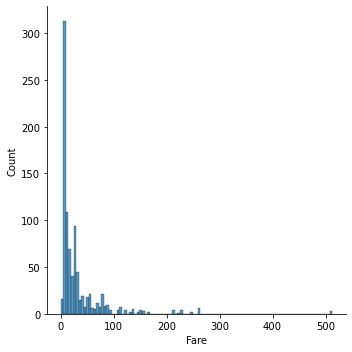

In [93]:
import seaborn as sns

# "displot" is shorthand for distribution plot
sns.displot( df.Fare )

Above, you should now see a histogram (in blue):
* The *x-axis* corresponds to the fare paid by each passenger.
* The *y-axis* corresponds to the **count**: the number of values falling in a given *bins*
  (i.e. a bar of the histogram).

By using the `kind` argument, one can change the type of plot from histogram `"hist"`, to density line `"kde"`, or cumulative distribution function `"ecdf"`.

For instance :

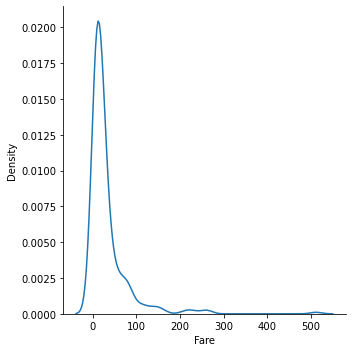

In [94]:
sns.displot( df.Fare, kind='kde' )
# Note: kde stands for 'kernel density estimation', which is the method used to compute this density line.

> Note that the y-axis is now in **density** units.

Naturally, many options can be set in order to combine plot types and pimp your plot :

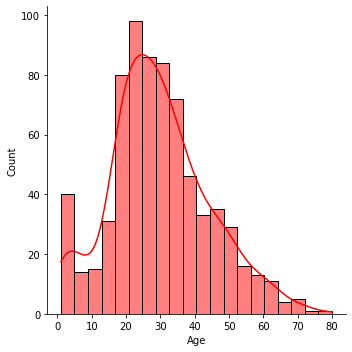

In [95]:
g = sns.displot(df.Age, kde=True, color='red')

> *Note:* having both the histogram and the density line switches the y-axis from density to count,
  which is sometimes more interpretable.


`sns.displot()` is what we could call a **figure-level** function:
 * it has several *kind* of representation.
 * it does not play nice in **multi-panel** figures.


[back to toc](#toc)

<br>

### Interlude: multi-panel figures <a id='multi'></a>

We create Multi-panel figures using `matplotlib` command and concepts. 
To make it simple, we call `fig, axes = plt.subplots( nb_rows , nb_cols )`, which creates:
 * `fig`, a `figure` object which controls the whole multipanel figure
 * `axes` : a list containing individual `axe` objects though which we can plot on individual panels of the figure


[<AxesSubplot:> <AxesSubplot:>]


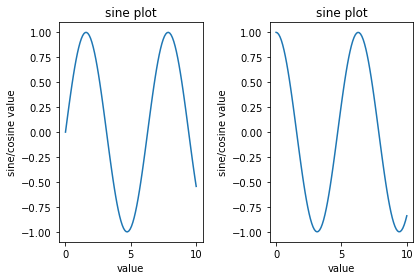

In [96]:
import numpy as np

# Create a list of 100 evenly spaced points between 0 and 10.
x = np.linspace(0, 10, 100) 

# Create a figure with multiple panels: 1 row, 2 columns
fig, axes = plt.subplots( 1, 2 )

print( axes ) # axes is a list of two axes objects

## plotting on the first axe == left panel
axes[0].plot(x, np.sin(x), label='sin')
axes[0].set_title("sine plot")
axes[0].set_xlabel("value")
axes[0].set_ylabel("sine/cosine value")

## plotting on the second axe == right panel
axes[1].plot(x, np.cos(x), label='cos')
axes[1].set_title("sine plot")
axes[1].set_xlabel("value")
axes[1].set_ylabel("sine/cosine value")

plt.tight_layout() ## this creates a more harmonious organization of the different panels
plt.show()

<br>

### back to data representation ...

The different `kind` (histogram, kde, ecdf) of `sns.displot()` can all be called individually using their own functions : `histplot()`, `kdeplot()`, `ecdfplot()`. 

In contrast to `sns.displot()` which is **figure-level**, these more-specialized functions are *axe-level* : they play nicely in a multiple panel context.

They interface with `matplotlib`'s axes using their `ax` argument.


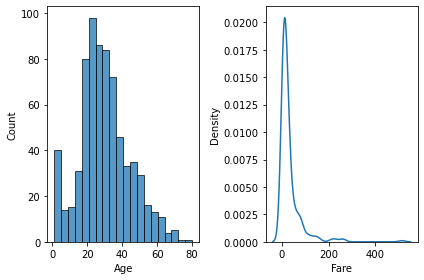

In [97]:
# Creating multiple panels : 1 row, 2 columns
fig, axes = plt.subplots( 1, 2 )

# Plotting on the first axe == left panel
sns.histplot(df.Age , ax = axes[0])

# Plotting on the second axe == right panel
sns.kdeplot(df.Fare , ax = axes[1])

plt.tight_layout()   # this creates a more harmonious organization of the different panels
plt.show()

<br>

In **histogram**, a different number of *bins* shows different aspects of the distribution of your data and so it is important to choose one that is appropriate to your sample size and data. 

By default, seaborn automatically infers the number of *bins*. 
You may stick with the original or change it:

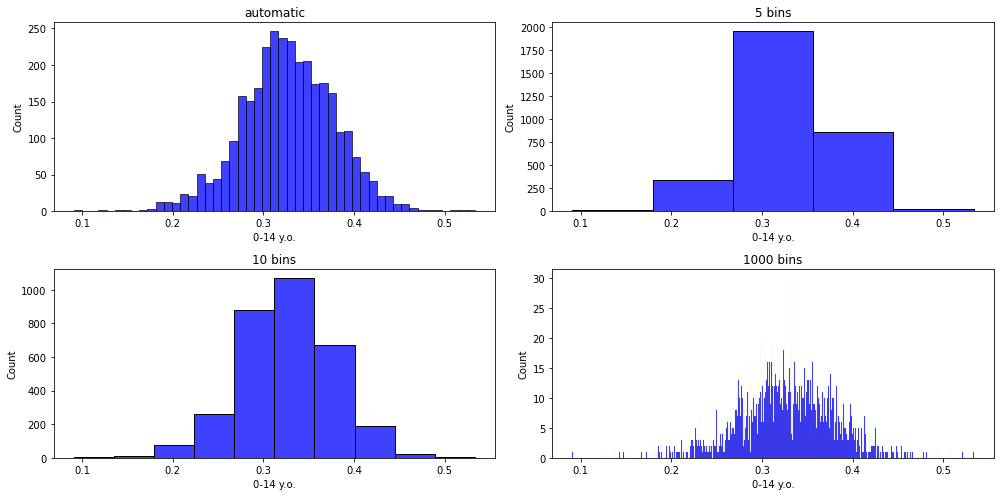

In [98]:
## let's play with a different dataset for this 
dfFractions = pd.read_table("data/census1880_fractions.csv", sep=",")

# Set up a figure with multiple panels, here a 2 by 2 grid
f, axes = plt.subplots( 2, 2, figsize=(14, 7) )

# axes is now a list of list of axes, to represent the 2d nature of our panels:
#  [ [<axe>,<axe>] ,
#    [<ax>,<axe>]]


# then you can specify where each plot goes on the figure with the ax argument of the ([0,0] is the top left corner)

# Plot a simple histogram with binsize determined automatically
sns.histplot(dfFractions['0-14 y.o.'], kde=False, color="b", ax=axes[0, 0]).set_title('automatic')

# Plot a simple histogram with binsize 5, 10 , 1000
sns.histplot(dfFractions['0-14 y.o.'], bins=5   , kde=False, color="b", ax=axes[0, 1]).set_title('5 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=10  , kde=False, color="b", ax=axes[1, 0]).set_title('10 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=1000 , kde=False, color="b", ax=axes[1, 1]).set_title('1000 bins')

plt.tight_layout()# this makes the panels margins and setup more graceful


So, to recap, we use `sns.histplot` instead of `sns.displot` : 
 * `histplot` : gives a lower-level kind of plot which is easier to manipulate in multiple figure.
 * `displot` : high-level function, with a lot of capabilities, but does not play nice if not the top figure.
     


<br>

We can combine graphical elements coming from `matplotlib` and `seaborn` quite seamlessly.

Here is a more advanced example where I represent the the **mean**, the **median** and the **mode** of a distribution on top of an histogram.


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Here we just define a small function for plotting a distribution with the mean median and mode 
def plotWithMeanMedianMode( dat , ax):
    """ 
        Takes:
            * dat : a pandas series
            * ax : a matplotlib axe    
    """
    mode=dat.mode()[0] #we only select the first mode
    mean=dat.mean()
    median=dat.median()

    sns.histplot( dat , kde=True , ax=ax) # line for histogram and density line

    ax.axvline(mean, color='r', linestyle='--' , label='Mean')
    ax.axvline(median, color='g', linestyle='-' , label='Median')
    ax.axvline(mode, color='b', linestyle='-' , label='Mode')
    ax.legend()


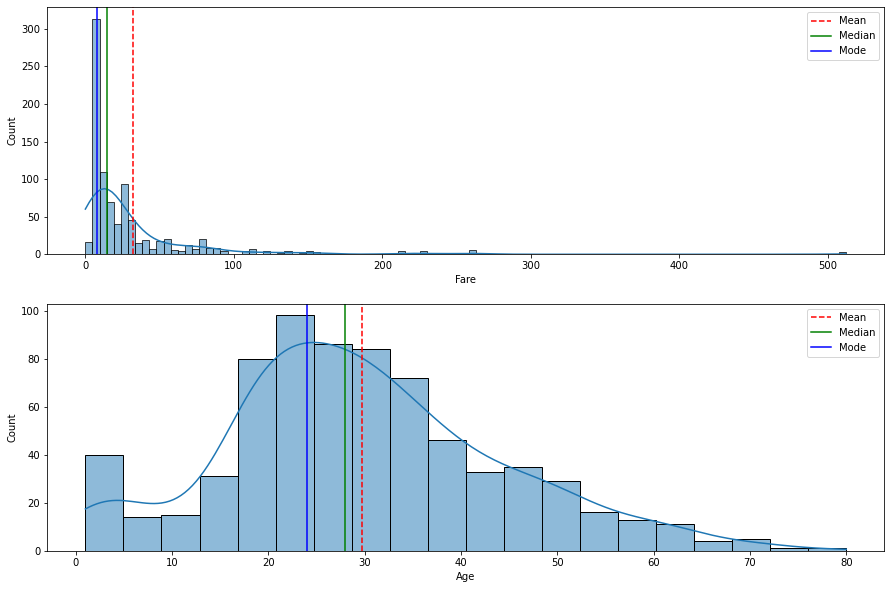

In [100]:
f, axes = plt.subplots( 2, 1, figsize=(15, 10) )

plotWithMeanMedianMode( df.Fare , ax=axes[0])
plotWithMeanMedianMode( df.Age , ax=axes[1])
plt.show()

Of note here :
 * `axvline`: create a vertical line.
 * `label`: legend label associated with the element created by this function.
   Common to a lot of matplotlib plotting functions.
 * `ax.legend()`: makes the legend appear.
 
> You can specify where the legend goes with `loc=` one of `{'best', 'upper left', 'upper right', 'lower left', 'lower right', 'upper center', 'lower center', 'center left', 'center right', 'center'}` or a `(x,y)` tuple  (more options to manually specify elements in the `help()`)

[back to toc](#toc)

<br>
<br>

## Exercise 2 - histograms

Using the Titanic dataset:

1. Plot the `Age` distribution among first class passengers. Try to choose an appropriate mode of 
   representation (histogram? density line? number of bins?).
2. Make a figure with 3 panels. In the panels, plot the histogram of the `Fare` among passengers in
   the first, second, and third class, respectively.


Solutions:

In [126]:
# %load -r 1-6 solutions/solution_01_02.py
# 1. Plot the Age distribution among first class passengers. Try to choose an appropriate mode of representation (histogram? density line? number of bins?)


In [125]:
# %load -r 7- solutions/solution_01_02.py
#2. Make a figure with 3 panels. In the panels, plot the histogram of the `Fare` among passengers in
#   the first, second, and third class, respectively.

<br>
<br>

[back to toc](#toc)

## 3.3 Accounting for categories in the data <a id='descr.3'></a>

Here the categories would be the passenger class of sex, but depending on data-sets they could be a genotype (Wild-Type versus KO), sex, experimental condition, ...

Of course, we could manually compute the means and plot an histogram for each category in our data-set, but pandas and seaborn offer much more efficient routines for this.


Computing a summary statistics on a pandas DataFrame is done **using the `df.groupby(...)` method and the applying some function** to the result of that grouping.

In [132]:
grouped = df.groupby('Sex')     # grouping by Sex.
grouped['Age'].median()         # median age.

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

So we get the median age per Sex. 

<br>

Of course here there are only two categories, but this gets very interesting when there is a lot of categories.

Remember our swiss census from 1880?


In [128]:
df_census = pd.read_table("data/swiss_census_1880.csv", sep=",")

grouped = df_census.groupby("canton name")
grouped["Catholic"].sum()                     # number of catholics per canton in 1880.

canton name
Aargau                               88893
Appenzell Ausserrhoden                3694
Appenzell Innerrhoden                12294
Basel-Landschaft                     12109
Basel-Stadt                          19288
Bern / Berne                         65828
Fribourg / Freiburg                  97113
Genève                               51557
Glarus                                7065
Graubünden / Grigioni / Grischun     41711
Luzern                              129172
Neuchâtel                            11651
Nidwalden                            11901
Obwalden                             15078
Schaffhausen                          4154
Schwyz                               50266
Solothurn                            63037
St. Gallen                          126164
Thurgau                              27123
Ticino                              130017
Uri                                  23149
Valais / Wallis                      99316
Vaud                                 18170

### Micro-Exercise:
* Make a copy of the `df` data frame with `df.copy()`. Name it `dfc`, as shown here:
```python
dfc = df.copy()
```

* Add a new column named "Age_category" to `dfc`. Make use of the `age_category` function defined below
  to classify passengers into their respective age classes.
```python
def age_category(x):
    age_classes = {"child": 12, "teenager": 17, "adult": 64, "senior": 200}
    for label, threshold in age_classes.items():
        if x <= threshold:
            return label
```

* Compute survival rates by gender, age category and passenger class.

<br>

Computing these summary statistics is all good, but you can also vizualize them using `seaborn` argument `hue` : 



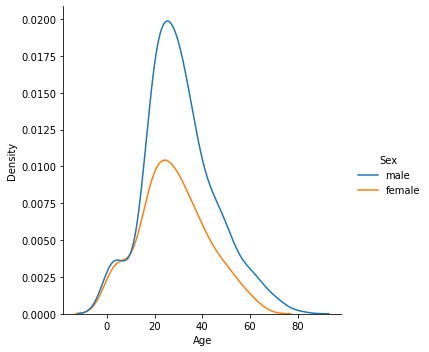

In [136]:
sns.displot( x='Age', hue='Sex', data=df, kind='kde')

`hue` is quite ubiquitous is seaborn functions, and lets you determine a categorical column by which you want to split your representation.

Note how we switched our syntax too: we now use column names, with a `data=` argument specifying from which `DataFrame` the data comes.

<br>

The default seaborn scheme is fairly nice, but maybe you want to change it :


<AxesSubplot:xlabel='Age', ylabel='Density'>

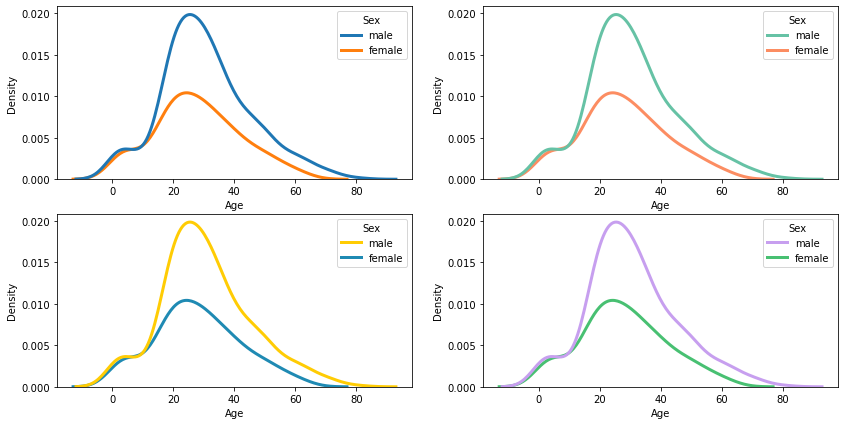

In [137]:
f, axes = plt.subplots( 2, 2, figsize=(14, 7) )

# default
sns.kdeplot( x='Age' , hue = 'Sex' , linewidth=3, data=df , ax = axes[0][0])

# using an existing seaborn palette
sns.set_palette(sns.color_palette('Set2'))
sns.kdeplot( x='Age' , hue = 'Sex' , data=df , linewidth=3, ax= axes[0][1])


# setting manually, with hex values
sns.kdeplot( x='Age' , hue = 'Sex' , data=df , linewidth=3, ax= axes[1][0] , 
           palette = ['#FFCC04','#1F8AB3'])


# setting semi manually, using the xkcd palette https://xkcd.com/color/rgb/
sns.kdeplot( x='Age' , hue = 'Sex' , data=df , linewidth=3, ax= axes[1][1] , 
           palette = [ 'xkcd:lavender' , 'xkcd:dark mint' ])


> *Note:* use `linewidth=` to get wider/narrower lines

You can learn more on all the options there :
 * [matplotlib colors](https://matplotlib.org/stable/tutorials/colors/colors.html)
 * [seaborn colors](https://seaborn.pydata.org/tutorial/color_palettes.html)
 

<br>

Sometimes, the `displot` options don't really cut it, perhaps because you have many diffrent categories, or maybe because you want to have more than one column to do the categorization.

This is when **`sns.catplot()`**, another **figure-level** function with a lot a `kind`, saves the day!


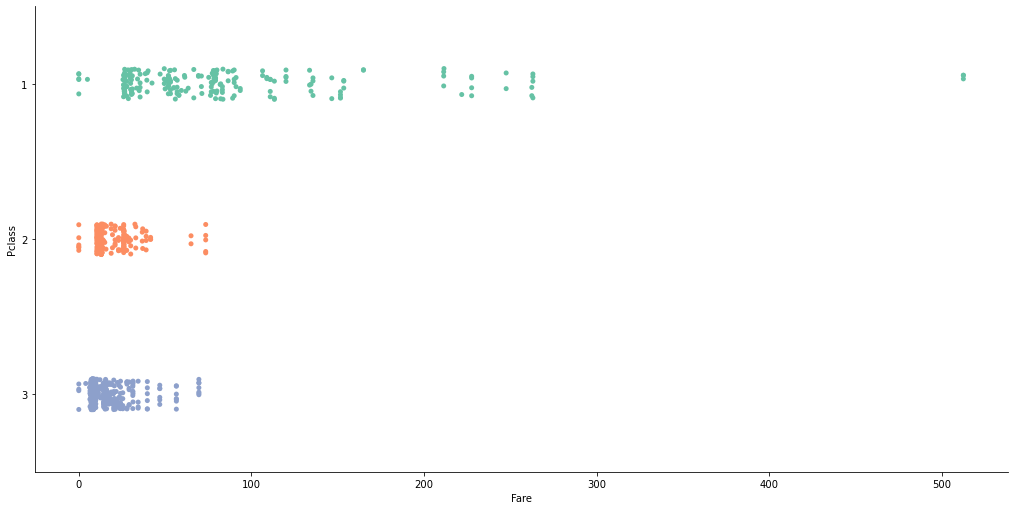

In [138]:
sns.catplot( x='Fare' , y = 'Pclass' , orient='horizontal' ,  data=df , aspect = 2.0 , height = 7)

Like `sns.displot`, `sns.catplot` is a master function which is designed to create a full figure at once rather than be embedded in a larger figure. 

This is why its arguments are a bit different when it comes to setting the figure *height and width*, which is done using :
 * `height` : height of the figure (no trick there)
 * `aspect` : width/height ratio of the figure ( high aspect -> wider figure )

The `kind` argument let's you control the overall look of the plot. I
It can be:
* 'strip' : this is the default, showing all data points. 
* **'box'** : the famous boxplot
* **'violin'** : an alternative to the boxplot using density lines
* **'bar'** : the (in)famous barplot
* 'swarm' : similar to 'strip' but with another way of aranging the points
* 'boxen' : some intermediary between a boxplot and a violin plot
* 'point' : alternative to the barplot where only the top point is shown



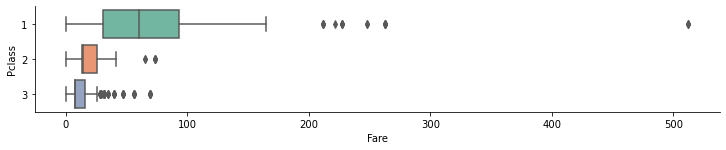

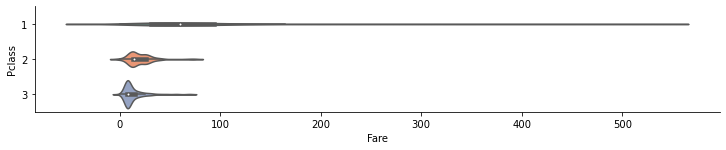

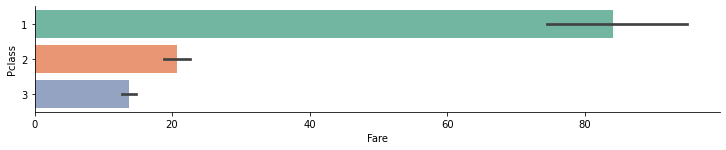

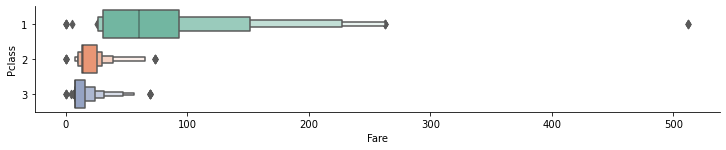

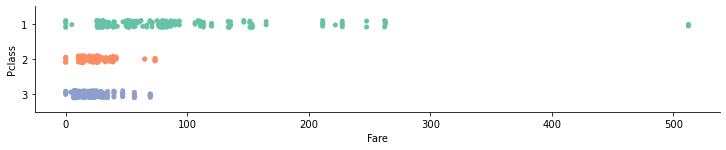

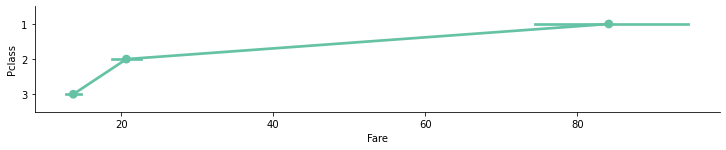

In [139]:
kinds = ['box','violin','bar','boxen','strip','point']  #,'swarm'] # swarm takes a long time to compute

for i,k in enumerate(kinds):
    sns.catplot( x='Fare', y='Pclass', orient='horizontal', data=df, kind=k, aspect=5 , height=2)


So here we can see:
 * **boxplot:** represent quartiles and a few other things
 * **violinplot:** density line plot with an (optional) boxplot in the center 
 * **barplot:** just shows the mean + an error bar (by default 95% CI computed using bootstrapping)
 * **boxen:** the unholy child of a boxplot and a violinplot
 * **strip:** the default, shows the points (super nice, except when you have a lot of points)
 * **point:** basically a barplot without bars and a line between categories

Given all this, one can reasonnably ask the question : **which one is the *best* ?**

While the answer is not clear about the best way to represent a distribution over one or multiple categories, we definitely have some [good answers regarding bad/misleading ways](https://stekhoven.shinyapps.io/barplotNonsense/) (hint, barplot does not shine).  




<br>

Anyhow the `hue` argument can also be used here to great effect:

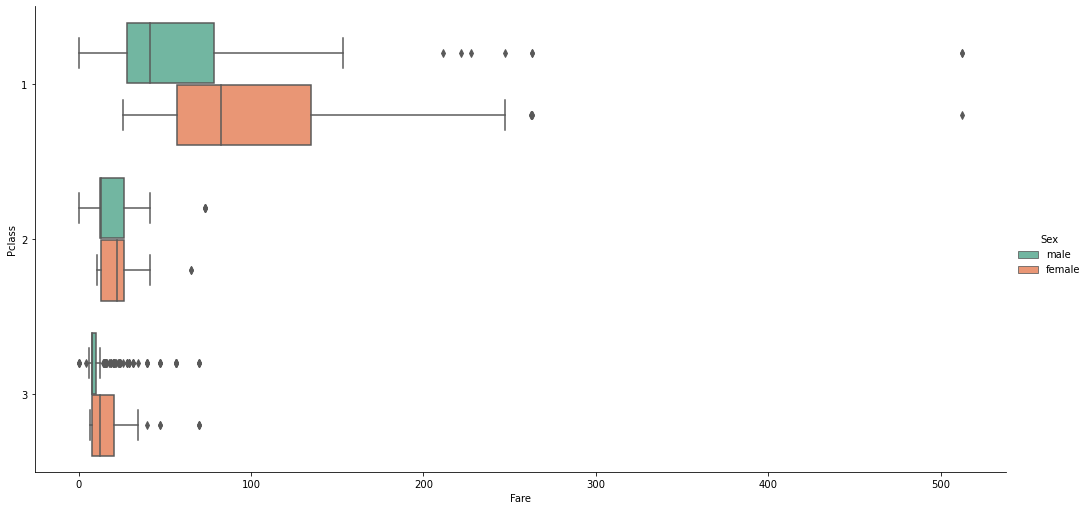

In [155]:
sns.catplot( x='Fare' , y = 'Pclass' , hue='Sex' , orient='horizontal' , kind='box', data=df , aspect = 2.0 , height = 7)
## it is also very nice with kind='point'

<br>

## Exercice 3 - representing categories

Using the 1880 swiss census data:

1. compute a new column "fraction60+" representing the fraction of 60+ years old people in each town.
    **hint :** column `'60+ y.o.'` contains the number of 60+ years old ; column `'Total'` contains
    the total number of inhabitant
    
2. Represent the proportion of people more 60 years old (`'60+ y.o.'`) across all cantons.
   Choose the most appropriate kind of plot.

In [141]:
df_census = pd.read_table("data/swiss_census_1880.csv", sep=",")
df_census.head()

,Year,town number,town name,Total,Swiss,Foreigner,Male,Female,0-14 y.o.,15-59 y.o.,...,German speakers,Franch speakers,Italian speakers,Romansche speakers,Non-national tongue speakers,district number,district name,canton number,canton,canton name
0,1880,1,Aeugst,646,627,19,319,327,217,379,...,645,0,1,0,0,101,Affoltern,1,ZH,Zürich
1,1880,2,Affoltern am Albis,2201,2088,113,1055,1146,713,1331,...,2193,5,3,0,0,101,Affoltern,1,ZH,Zürich
2,1880,3,Bonstetten,771,754,17,361,410,266,449,...,771,0,0,0,0,101,Affoltern,1,ZH,Zürich
3,1880,4,Hausen,1363,1305,58,640,723,343,884,...,1342,12,9,0,0,101,Affoltern,1,ZH,Zürich
4,1880,5,Hedingen,907,867,40,448,459,255,567,...,893,0,9,0,5,101,Affoltern,1,ZH,Zürich


In [144]:
# %load -r 1-6 solutions/solution_01_03.py
# 1.


In [159]:
# %load -r 7- solutions/solution_01_03.py
# 2.

Of course possibilities are endless. Here is a fancy one, inspired by [this](https://seaborn.pydata.org/examples/kde_ridgeplot.html) and its [later correction](https://www.pythonfixing.com/2022/02/fixed-python-seaborn-ridge-plot.html).

In [175]:
# %load solutions/solution_01_03_fancy.py
# fancy solution inspired by  https://seaborn.pydata.org/examples/kde_ridgeplot.html


<br>
<br>

[back to toc](#toc)

## 3.4 Representing the relationship between 2 numerical variables <a id="descr.4" ></a>

**`sns.scatterplot()`** lets us represent the relationship between two numerical variables.

In [179]:
df = pd.read_table("data/titanic.csv", sep=",") ## just in case we need to re-read  the data

In [191]:
#reset the seaborn default theme
sns.reset_orig()

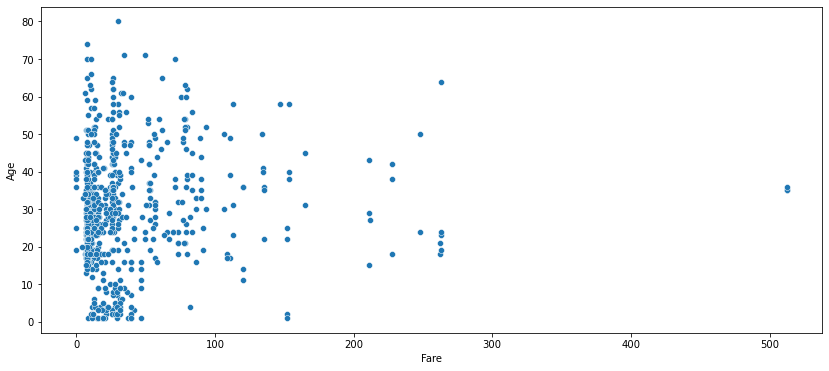

In [192]:
fig = plt.figure(figsize=(14,6))
ax = sns.scatterplot(x='Fare', y='Age', data=df)

OK, it is not so nice... let's set the x-axis to a log scale :

(3, 1000)

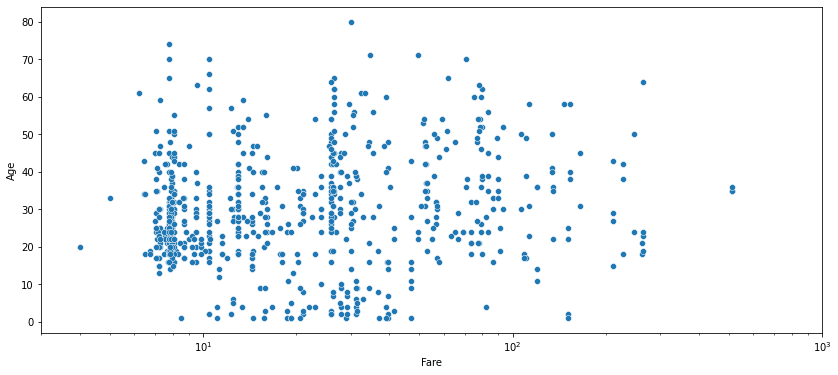

In [193]:
fig = plt.figure(figsize=(14,6))
ax = sns.scatterplot( x = 'Fare' , y = 'Age' , data=df )
ax.set(xscale="log")      # setting axis to log scale.
ax.set_xlim( (3,1000) )   # manually setting the limit of the x axis.

Of course, we can customize :

(3, 1000)

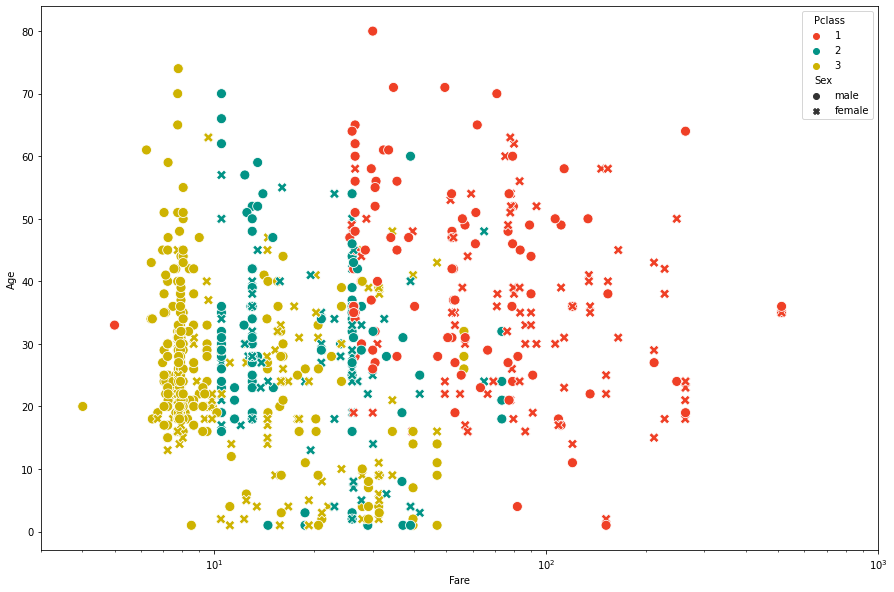

In [203]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot( x = 'Fare' , y = 'Age' , 
                     hue='Pclass' , palette=['xkcd:tomato','xkcd:teal','xkcd:mustard'],
                     style='Sex', data=df , s=100 )
ax.set(xscale="log")      # setting axis to log scale.
ax.set_xlim( (3,1000) )   # manually setting the limit of the x axis.


> *Note:* `style=` associates the marker shape to a column.

Finally, a little data exploration trick : **`sns.pairplot()`**

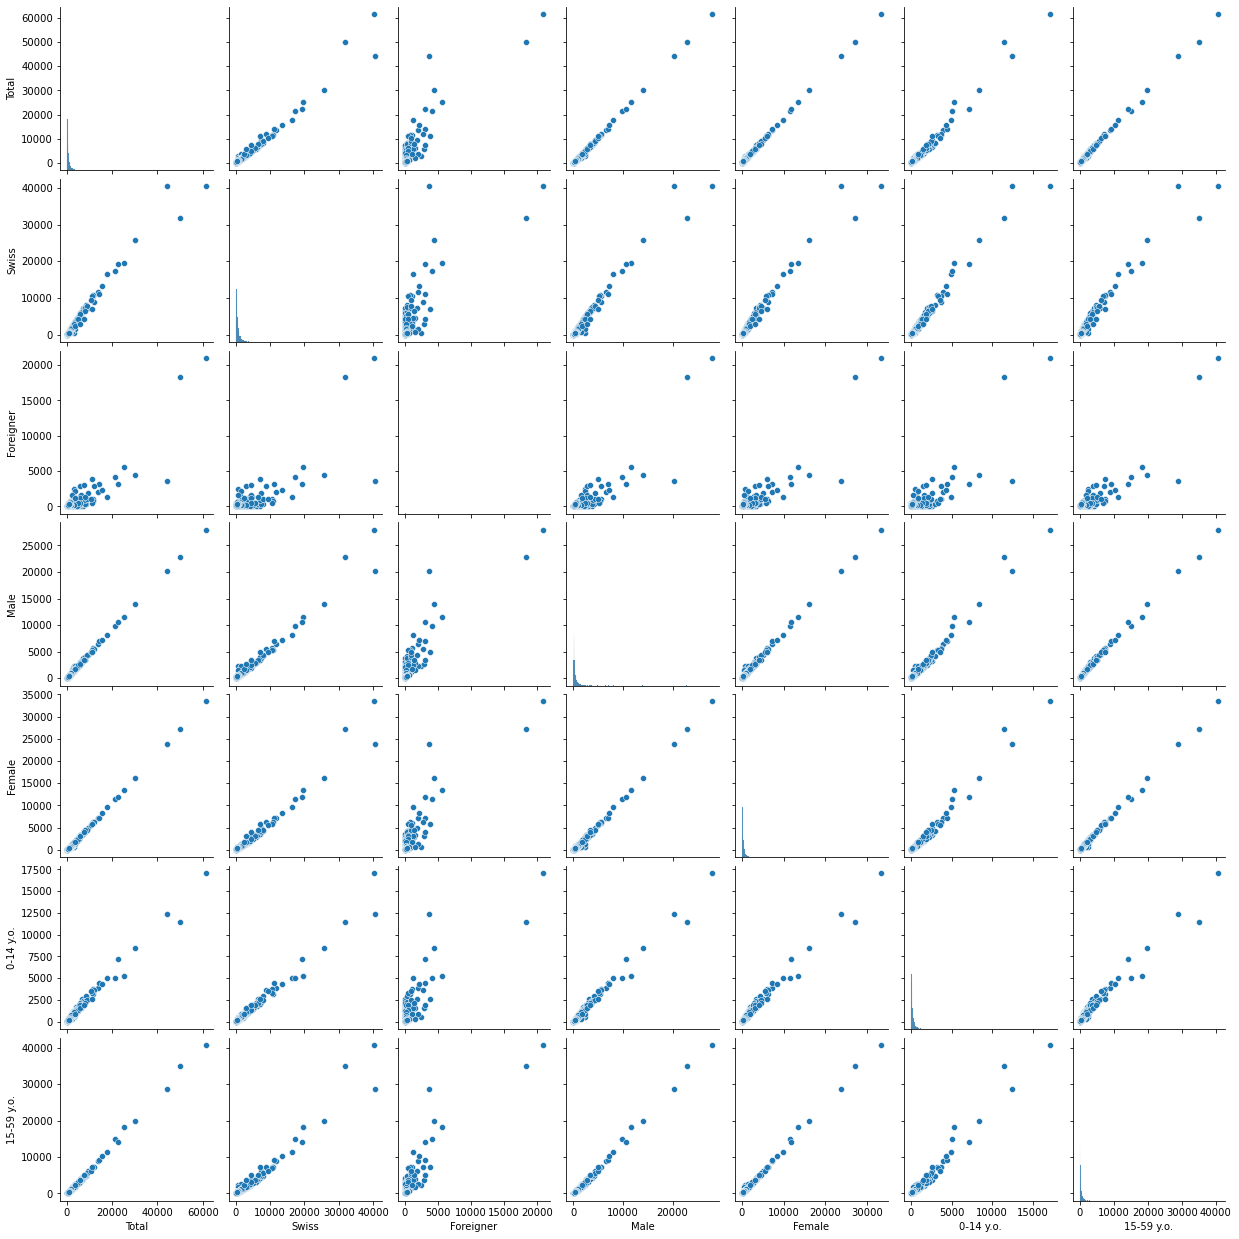

In [195]:
sns.pairplot(df_census.iloc[:,3:10] )

<br>
<br>
<br>

[back to toc](#toc)


# 4. Writing data and plots to disk <a id='writing'></a>
-------------------------------------------------

To write your data-set to a file, use:

In [204]:
df.to_csv('myData.csv')

As you can see, it is about as simple as reading. Actually, it is really similar.
You have several functions :
* `to_csv()`: write DataFrame as comma-separated file, or any other separator-delimited format such as
  tab-delimited. 
* `to_excel()`: write DataFrame in Excel format.
* `to_html()`: write DataFrame in HTML format.
* More [writer functions are available](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

<br>

... and similar arguments : when using the `to_csv()` writer functions, some useful arguments are:
* `sep`: the type of delimiter to use. By default, `sep=","`. To write a tab-delimited file e.g., one would
  set `sep="\t"`.
* `header=None` to not include the header in the exported file.


<br>

To save figures to disk, we rely on the **`savefig()`** method:
* Different output formats can be specified by changing the output file name extension, 
  e.g. `.pdf`, `.svg`, `.jpg`, ...
* For raster formats, the `dpi` argument can help define the image quality.
* See `help(plt.savefig)` or [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html?highlight=savefig#matplotlib.pyplot.savefig) for more info.

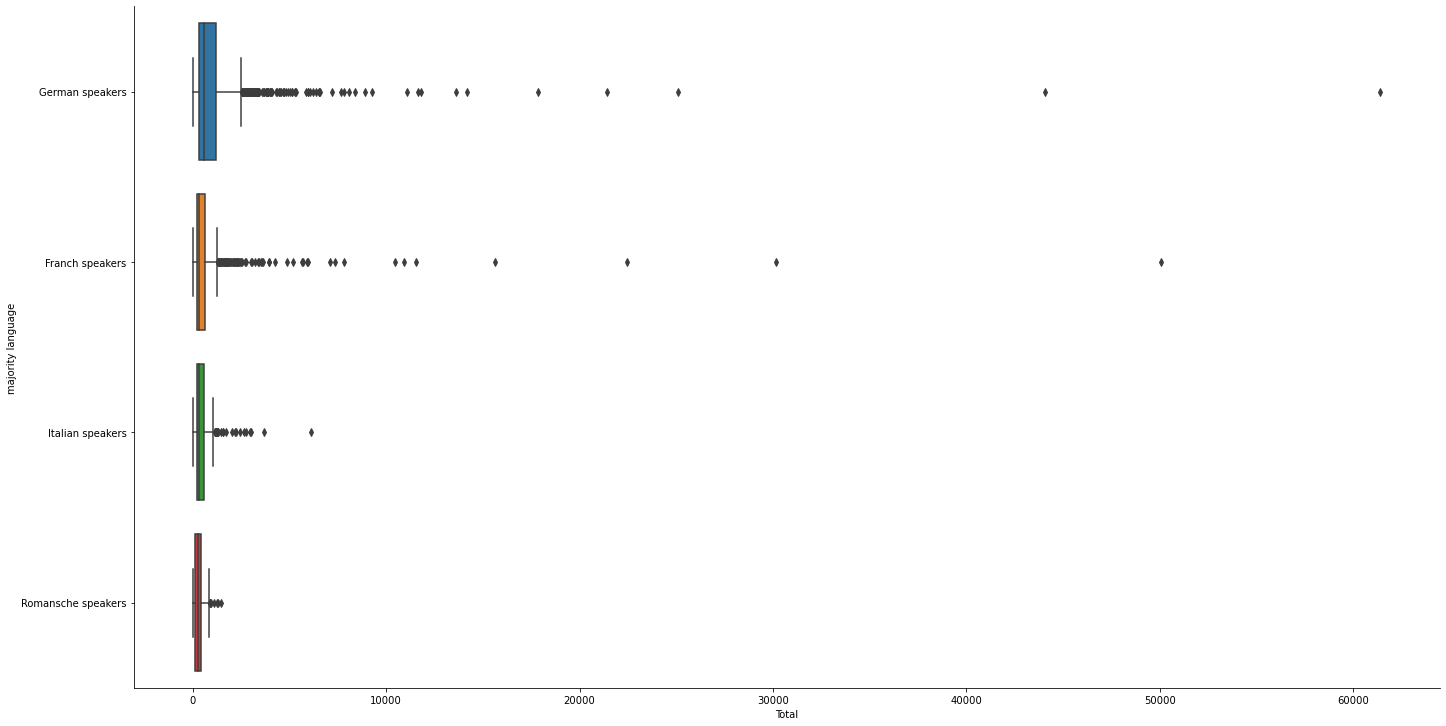

In [205]:
k='box'

# Make you plot as usual, redirecting it to a variable (my_plot)
represented_variable , category = 'Total' , 'majority language'
my_plot = sns.catplot( x = represented_variable , y= category ,
             data=dfFractions , kind = k , orient='h',height=10, aspect=2 )

# Save plot to disk, using the savefig() method:
my_plot.savefig("output.png")

In [206]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

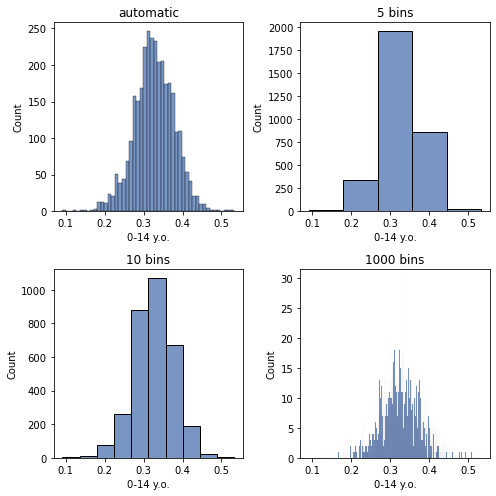

In [207]:
# For multipanel figures:
f, axes = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(dfFractions['0-14 y.o.'], kde=False, color="b", ax=axes[0, 0]).set_title('automatic')
sns.histplot(dfFractions['0-14 y.o.'], bins=5   , kde=False, color="b", ax=axes[0, 1]).set_title('5 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=10  , kde=False, color="b", ax=axes[1, 0]).set_title('10 bins')
sns.histplot(dfFractions['0-14 y.o.'], bins=1000 , kde=False, color="b", ax=axes[1, 1]).set_title('1000 bins')
plt.tight_layout()# this makes the panels margins and setup more graceful

f.savefig('output_multipanel.pdf')

<br>
<br>
<br>

[back to toc](#toc)

# 5. Free form exercise <a id='exo'></a>
---------------------------------

The goal of this exercise is to perform an exploration of some data related to heart disease.

In particular, we want to explore the relationship between a `target` variable - whether patient has a heart disease or not - and several other variables such as cholesterol level, age, ...

The data is present in the file `'data/heartData_simplified.csv'`, which is a cleaned and simplified version of the [UCI heart disease data set](https://archive.ics.uci.edu/ml/datasets/heart+Disease)


### Description of the columns

* age : Patient age in years
* sex : Patient sex
* chol : Cholesterol level in mg/dl. 
* thalach : Maxium heart rate during the stress test
* oldpeak : Decrease of the ST segment during exercise according to the same one on rest.
* ca : Number of main blood vessels coloured by the radioactive dye. The number varies between 0 to 3.
* thal : Results of the blood flow observed via the radioactive dye.
	* defect -> fixed defect (no blood flow in some part of the heart)
	* normal -> normal blood flow
	* reversible -> reversible defect (a blood flow is observed but it is not normal)
* target : Whether the patient has a heart disease or not

### Instructions

As stated earlier, your goal is to explore this data-set. 
One objective of this would be to diagnose eventual problems in this dataset (outliers, strange values) and prepare further statistical analysis and reporting.

To this end you will want to formulate a number of hypothesis that would be interesting to pursue from this data (*e.g.*, is heart disease linked to  cholesterol levels), and gather evidence (plots, summary statistics) explaining why this hypothesis seems to be worth testing for.

> Note : we do not ask you to perform the statistical testing itself. Do it if you feel like it.

We will not provide a particular set of precise questions, but here are a few checkpoints to help you get stared :

* Read the data as a pandas `DataFrame`
* Compute summary statistics for the different variables 
* eventually, do the same for different subset of the data (for instance, grouping by sex)
* use visualization to help you describe the relationship between the different variables
* choose a few associations (2?4?) that seems promising and describe them


<br>
<br>
<br>

[back to toc](#toc)


# 6. tips and tricks <a id='tricks'></a>
---------------------------

This is a collection of nice tricks that don't really blong anywhere but are nice to know


## 6.1 Applying custom functions to a DataFrame by rows or columns

As we have just seen, pandas DataFrame have a number of built-in methods - e.g. `describe()`, `count()`, `mean()` - that can be applied row-wise or column-wise.

But it is also possible to apply any custom function on rows/columns using `apply(func, axis)`:
* `func`: the function to apply.
* `axis=0` to apply the function row-wise (this is the default), or `axis=1` to apply it column-wise.

For example, let's implement our own version of the built-in [`mean()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html).

**Note:** the `apply()` function only works on DataFrames. To apply a custom function to each element in a Series 
(e.g. a single column of a DataFrame), the `map()` function can be used. E.g.: `df["Survived"].map(func)`

<br>

**Example**

In [ ]:
# Print the DataFrame as a reminder:
df.head()

In [ ]:
def longest_str(seq):
    max_len = -1
    max_value = ''
    for x in seq:
        length = len(str(x))
        if length > max_len:
            max_len = length
            max_value = x
    return max_value

# Test of the longest_str() function on dummy data:
print("The longest string is:", longest_str(("eggs", "hello world", "helloworld", "spam")), "\n")

In [ ]:
# Apply custom function by column (i.e row with the most characters in each column):
print(df.apply(longest_str, axis=0), "\n")

In [ ]:
# Apply custom function by row (i.e column with the most characters in each row):
print(df.apply(longest_str, axis=1), "\n")

<br>

## 6.2 Sorting operations on dataframes

DataFrames can be sorted on one or more specific column(s) using **`sort_values()`**:

In [ ]:
df_sc = df_sc.sort_values(df_sc.columns[0], ascending=False)
df_sc.head()

<br>

Or we can sort by index using **`sort_index()`**:

In [ ]:
df_sc.sort_index(ascending=True).head()

Finding the maximum value in each column. Note the `axis` parameter. This gives the dimension along which values are compared. `axis=0` indicates that the comparison is across rows and there looping over all index values in all other dimensions. In this case, for each column we got a value.

In [ ]:
df_sc.max(axis=0)

Let's now find the max in each row (in this case for each gene), over all columns (samples):

In [ ]:
df_sc.max(axis=1).head()

Maybe what we want is not the maximum value but the index at which it is found: 

In [ ]:
df_sc.idxmax(axis=1).head()

<br>
<br>

## 6.4 Merge and join DataFrames

The **[`merge()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)** and **[`join()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)** methods allow to combine DataFrames, linking their rows based on a common column (other referred to as a **key**).

To illustrate these 2 methods, let's create 2 DataFrames that we can merge.
> *Note:* this also illustrates how **a dataframe can be constructed from a dictionary** data structure.
  The dictionary keys are treated as column names, and the list of values associated with a key is
  treated as list of elements in the corresponding column. Note that all columns should have the same
  number of elements (or a single element, in which case all rows of the column contain this same
  element).  
  If no index is specified, pandas uses its default indexing, i.e. row positions.

In [ ]:
df1 = pd.DataFrame({
    'key': ['b','b','a','c','a','a','b'], 
    'data1': range(7)
})
df1

In [ ]:
df2 = pd.DataFrame({
    'key': ['a','b','d'], 
    'data2': range(3)
})
df2

Let's merge the two data frames, with the default application of the `merge()` function:

In [ ]:
pd.merge(df1, df2)

How has python interpreted our call to `merge()`?

1. It has assumed that we want to merge on the basis of the common `key` column.
2. It has identified the values of `key` which occur in both dataframes.
3. It has generated a dataframe with all combinations of rows from dataframes 1 and 2 that are 
   associated with a particular `key` value.

We can be more precise by specifying how to merge the dataframes, using the **`on`** option:

In [ ]:
pd.merge(df1, df2, on="key")

By default, merge performs an "inner" operation, taking the intersection of the key sets. However, we can specify the way we want to merge by passing `"outer"`, `"left"`, `"right"` to the **`how`** argument. This determines which set of keys to consider (the union of the two sets, all of those that occur in df1, all of those that occur in df2). Missing values show up as `NaN`.

In [ ]:
pd.merge(df1, df2, on="key", how="outer")

Merging can also be done based on the index values. Let's illustrate this using the mouse heart gene expression dataset we used earlier:

In [ ]:
df = pd.read_table("data/heartData_simplified.csv")
df.head()

Let's create two data frames, one containing the data for the WT and the other for the KO:

In [ ]:
wt_cols = [col for col in df.columns if 'WT' in col and 'avg' not in col and 'log' not in col]
ko_cols = [col for col in df.columns if 'KO' in col and 'avg' not in col and 'log' not in col]
df_WT = df[wt_cols]
df_KO = df[ko_cols]
print(df_WT.head())
print(df_KO.head())

Let's merge these frames based on the index:

In [ ]:
merged_df = pd.merge(df_WT, df_KO, left_index=True, right_index=True)
merged_df.head()

<br>

## 6.5 wide and long format

**Wide :**

| Id     | mol1   | mol2    |
| ------ |:------:| -------:|
| a      | 1.0    | 10.0    |
| b      | 2.0    |   20.0  |
| c      | 3.0    |    30.0 |

**Long :**

| Id     | Value  | Attr    |
| ------ |:------:| -------:|
| a      | 1.0    | mol1    |
| a      | 10.0   | mol2    |
| b      | 2.0    | mol1    |
| b      | 20.0   | mol2    |
| c      | 3.0    | mol1    |
| c      | 30.0   | mol2    |


Sometimes it can be interesting to go from wide to long or long to wide, because some operations are easier on one format or the other.

In [ ]:
# Data in wide format:
df_sc.head()

In [ ]:
df_sc["gene"] = df_sc.index
df_sc_long = pd.melt(df_sc, id_vars=['gene']) # to long format, with gene as identifiers 
df_sc_long.head()

In [ ]:
# This now allows us to do this, which was a bit difficult otherwise :
df_sc_long['logVal'] = np.log10(10**0 + df_sc_long['value'])

ax = sns.catplot( x='logVal' , y='variable' , orient='horizontal' , data=df_sc_long , aspect = 2 , height = 7 )